# Data Mining & Machine Learning - Classification Sneak Peek

### Case: Classification of Legendary Pokémon with Supervised Learning

83109 Samuel Didovic<br>
86368 Isabel Lober<br>
85915 Pascal Seitz<br>

Lecturer: Prof. Dr. Adrian Moriariu

![alt text](test_classification.jpg "Lugia")

## Table of Contents
1. [Step 1: Dataset Cleaning](#intro)
2. [Step 2: Exploratory Data Analysis (EDA)](#second)
3. [Step 3: Model Building: Classification](#third)

### Disclaimer
This is just a sneek peek of our classification project. It serves as a basic outline of the topic. The Jupyter Notebook for the examination date will be more comprehensive.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

<br>

### Step 1: Cleaning <a name = "intro"></a>

Cleaning activities follow a straight forward protocol. The aim is to fundamentally understand the data, identify inconsistencies and correct them in order to ensure a high-quality analysis.

In [3]:
df = pd.read_csv("pokemon_sneak_peek.csv")

In [4]:
df.shape

(801, 22)

In [5]:
df.head()

,name,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,...,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,...,88.1,65,65,45,grass,poison,6.9,1,0,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,...,88.1,80,80,60,grass,poison,13.0,1,0,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,...,88.1,122,120,80,grass,poison,100.0,1,0,0
3,Charmander,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,...,88.1,60,50,65,fire,NaN,8.5,1,0,0
4,Charmeleon,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,...,88.1,80,65,80,fire,NaN,19.0,1,0,0


<br>

Transpose the dataset to provide an appropriate overview, since not every feature is displayed.<br>
Additionally, display some random rows to get a proper understanding of the data.

In [6]:
df.sample(5).T

,642,768,219,641,146
name,Reshiram,Sandygast,Swinub,Thundurus,Dratini
abilities,['Turboblaze'],"['Water Compaction', 'Sand Veil']","['Oblivious', 'Snow Cloak', 'Thick Fat']","['Prankster', 'Defiant', 'Volt Absorb']","['Shed Skin', 'Marvel Scale']"
attack,120,55,50,105,64
base_egg_steps,30720,3840,5120,30720,10240
base_happiness,0,70,70,90,35
base_total,680,320,250,580,300
capture_rate,3,140,225,3,45
classification,Vast White Pokémon,Sand Heap Pokémon,Pig Pokémon,Bolt Strike Pokémon,Dragon Pokémon
defense,100,80,40,70,45
experience_growth,1250000,1000000,1250000,1250000,1250000


From this randomly chosen Pokémon, we now have gained some insights.<br>
- We might see values of type String, Integer and Float.<br>
- Further, there are some NaN values in `percentage_male` as well as in `type2`.<br>

Therefore, it is worth looking over these features in an in-depth view.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   attack             801 non-null    int64  
 3   base_egg_steps     801 non-null    int64  
 4   base_happiness     801 non-null    int64  
 5   base_total         801 non-null    int64  
 6   capture_rate       801 non-null    int64  
 7   classification     801 non-null    object 
 8   defense            801 non-null    int64  
 9   experience_growth  801 non-null    int64  
 10  height_m           801 non-null    float64
 11  hp                 801 non-null    int64  
 12  percentage_male    703 non-null    float64
 13  sp_attack          801 non-null    int64  
 14  sp_defense         801 non-null    int64  
 15  speed              801 non-null    int64  
 16  type1              801 non

This gives insights of the data type for each column.<br>
In sum, there's a total number of 
- **3** columns containing **float types** 
- **14** columns containing **integer types**
- **5** columns containing **object types**.

In [8]:
df.isnull().sum()

name                   0
abilities              0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classification         0
defense                0
experience_growth      0
height_m               0
hp                     0
percentage_male       98
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0
is_legendary           0
genderless             0
dtype: int64

In [9]:
df[df["type2"].isnull()].head().T

,3,4,6,7,8
name,Charmander,Charmeleon,Squirtle,Wartortle,Blastoise
abilities,"['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']"
attack,52,64,48,63,103
base_egg_steps,5120,5120,5120,5120,5120
base_happiness,70,70,70,70,70
base_total,309,405,314,405,630
capture_rate,45,45,45,45,45
classification,Lizard Pokémon,Flame Pokémon,Tiny Turtle Pokémon,Turtle Pokémon,Shellfish Pokémon
defense,43,58,65,80,120
experience_growth,1059860,1059860,1059860,1059860,1059860


The difference between these two is, that the latter returns a series of boolean values whereas `type2` is true and false if not.<br>
The previous one returns the df itself, which is useful to see the direct cause. Further, it only returns the slice of
the df, where `type2` is null!<br>
<br>
This examination basically shows, that some Pokémom doesn't have a second type. This should kept in mind for later.

In [10]:
df["type2"].fillna("None", inplace = True)
df["percentage_male"].fillna("None", inplace = True)

At this point, usually a confirmation of the changes takes place. Assume for time saving reasons, that the df is clean. 

### Step 2: Exploratory Data Analysis (EDA) <a name = "second"></a>

An EDA is the step where one understand the data in detail.

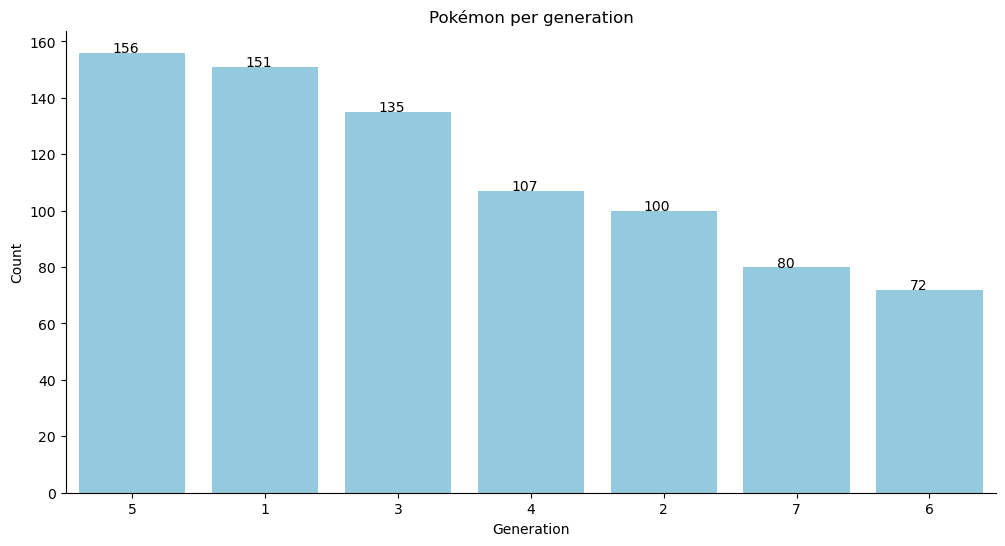

In [11]:
# Order the output of Pokémon introduced in each generation.

plt.figure(figsize = (12, 6))

ax = sns.countplot(x = "generation",
                  data = df,
                  order = df["generation"].value_counts().index,
                  color = "skyblue")

ax.set_title("Pokémon per generation")
ax.set(xlabel = "Generation", ylabel = "Count")

for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
sns.despine()

In [12]:
# Legendary Pokémon.

legendary_pkmn = df["is_legendary"].sum()
legendary_pkmn

70

In [13]:
# Non-legendary Pokémon.

pkmn = df.count().iloc[0] # Count all Pokémon in dataset first.

non_legendary_pkmn = pkmn - legendary_pkmn
non_legendary_pkmn

731

In [14]:
pkmn

801

In [15]:
# Create df's consisting of legendary and non-legendary Pokémon.
df_legendary = df[df["is_legendary"] == 1]
df_non_legendary = df[df["is_legendary"] == 0]

In [16]:
# Average capture rate for legendary Pokémon.
avg_cap_rate_legendary = round(df_legendary["capture_rate"].mean(), 2)
print(f"Average Capture Rate for legendary Pokémon: {avg_cap_rate_legendary}")

# Average capture rate for non-legendary Pokémon.
avg_cap_rate_non_legendary = round(df_non_legendary["capture_rate"].mean(), 2)
print(f"Average Capture Rate for non-legendary Pokémon: {avg_cap_rate_non_legendary}")

Average Capture Rate for legendary Pokémon: 17.99
Average Capture Rate for non-legendary Pokémon: 106.4


In [17]:
# Define an overall correlation of the capture rate.
overall_capture_corr = df["capture_rate"].corr(df["is_legendary"])
print(f"Overall correlation: {overall_capture_corr}")

Overall correlation: -0.3276772302416779


The analysis shows legendary Pokémon are harder to catch than non-legendary ones.<br>
It seems, that `capture_rate` may also be of use.<br>

Plot the findings.

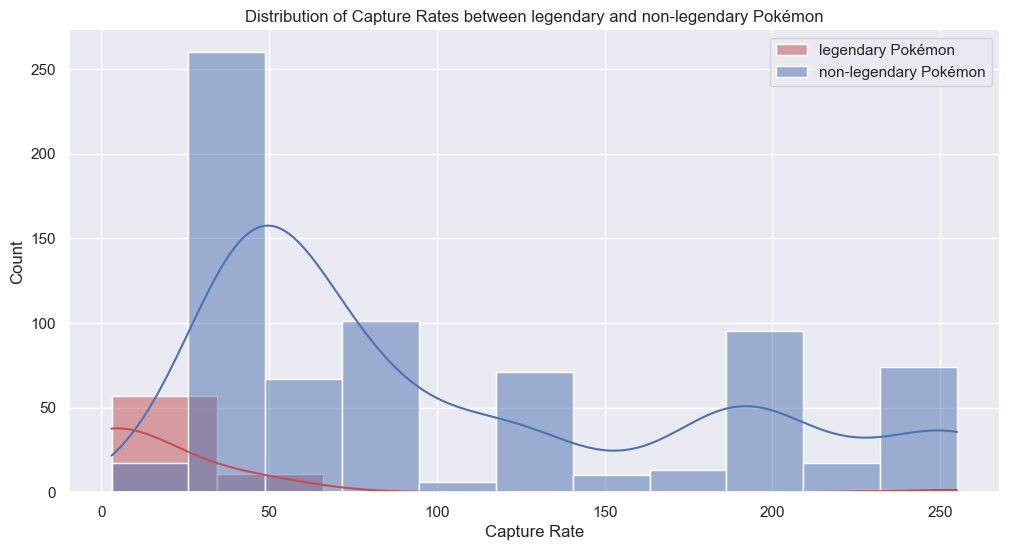

In [18]:
sns.set(rc = {"figure.figsize": (12, 6)})

sns.histplot(data = df_legendary,
            x = "capture_rate",
            kde = True,
            label = "legendary Pokémon",
            color = "r")

sns.histplot(data = df_non_legendary,
            x = "capture_rate",
            kde = True,
            label = "non-legendary Pokémon",
            color = "b")

plt.legend()
plt.title("Distribution of Capture Rates between legendary and non-legendary Pokémon")
plt.xlabel("Capture Rate")
plt.ylabel("Count")

sns.despine()

Usually, a lot more investigations on features would follow. Continue with prediction models.

### Step 3: Model Building: Classification <a name = "third"></a>

Define variables

In [19]:
X = df[["base_total", "capture_rate", "generation"]].values # Features considered in our model
y = df["is_legendary"].values # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Fit scaler object to training data
scaler = StandardScaler() 
scaler.fit(X_train)

# Scale training and test data on the same scale / benchmark
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       183
           1       0.74      0.94      0.83        18

    accuracy                           0.97       201
   macro avg       0.87      0.96      0.90       201
weighted avg       0.97      0.97      0.97       201

The accuracy score the model achieved is: 96.52 %


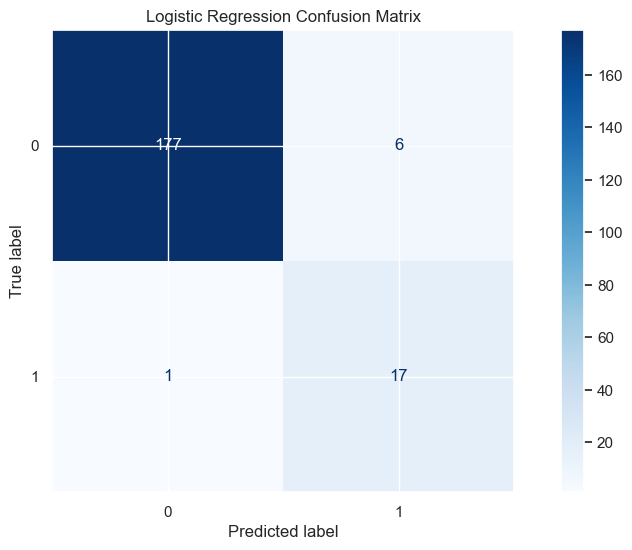

In [20]:
# Initialize model and fit training data
log = LogisticRegression()
log.fit(X_train_scaled, y_train)

# Variable for prediction (actual prediction happens here)
y_pred_log = log.predict(X_test_scaled)

score_log = round(accuracy_score(y_pred_log, y_test) * 100, 2)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_pred_log, y_test))
print("The accuracy score the model achieved is: " + str(score_log) + " %")

# Visualization with confusion matrix
cm_log = confusion_matrix(y_pred_log, y_test, labels = log.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix = cm_log, display_labels = log.classes_)
disp_log.plot(cmap = plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Decision Trees

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       183
           1       0.78      1.00      0.88        18

    accuracy                           0.98       201
   macro avg       0.89      0.99      0.93       201
weighted avg       0.98      0.98      0.98       201

The accuracy score the model achieved is: 97.51%


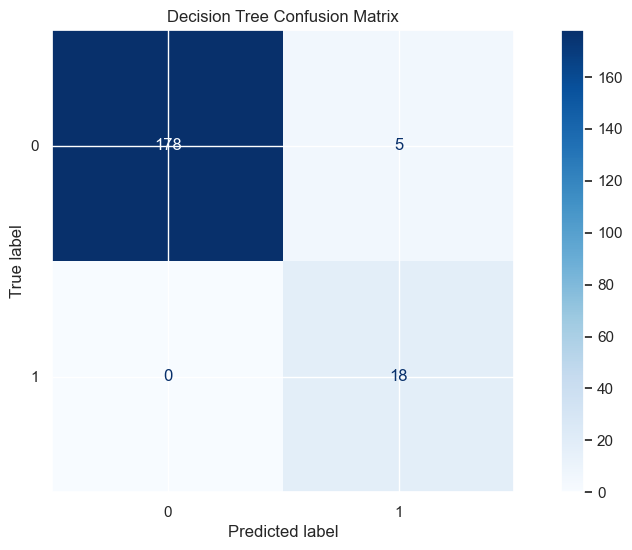

In [21]:
# Decision Tree model
tree = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree.fit(X_train, y_train)

# Perform the prediction
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_pred_tree, y_test))
print(f"The accuracy score the model achieved is: " + str(round(accuracy_score(y_pred_tree, y_test) * 100, 2)) + "%")

# Visualization with confusion matrix
cm_tree = confusion_matrix(y_pred_tree, y_test, labels = tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = tree.classes_)
disp_tree.plot(cmap = plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

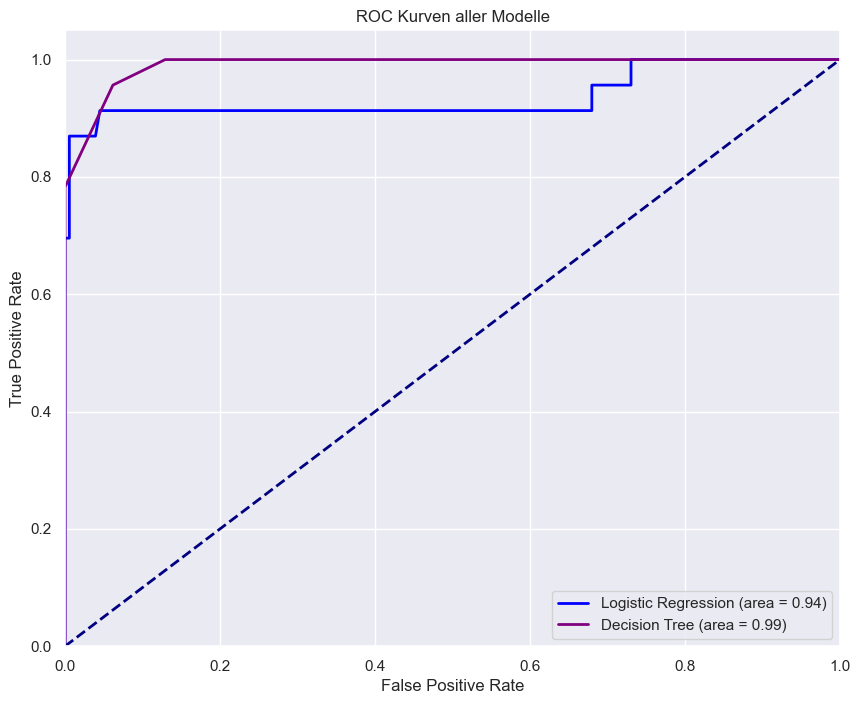

In [22]:
# Calculate predictions of the models
y_prob_log = log.predict_proba(X_test_scaled)[:, 1]
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC value for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot der ROC-Kurven
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_log)
plt.plot(fpr_tree, tpr_tree, color='purple', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_tree)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Kurven aller Modelle')
plt.legend(loc="lower right")
plt.show()

In [23]:
for i in ['Arceus','Pikachu','Latios','Zoroark', 'Metagross']:
    example = df[df['name'] == i][["base_total", "capture_rate", "generation"]]
    print("Pokémon: {} | Predicted:{} | Actual:{}".format(i, log.predict(example), df[df['name'] == i]['is_legendary'].values))
    print('--------------------------------------------')

Pokémon: Arceus | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokémon: Pikachu | Predicted:[1] | Actual:[0]
--------------------------------------------
Pokémon: Latios | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokémon: Zoroark | Predicted:[1] | Actual:[0]
--------------------------------------------
Pokémon: Metagross | Predicted:[1] | Actual:[0]
--------------------------------------------


In [24]:
for i in ['Arceus','Pikachu','Latios','Zoroark', 'Metagross']:
    example = df[df['name'] == i][["base_total", "capture_rate", "generation"]]
    print("Pokémon: {} | Predicted:{} | Actual:{}".format(i, tree.predict(example), df[df['name'] == i]['is_legendary'].values))
    print('--------------------------------------------')

Pokémon: Arceus | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokémon: Pikachu | Predicted:[0] | Actual:[0]
--------------------------------------------
Pokémon: Latios | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokémon: Zoroark | Predicted:[0] | Actual:[0]
--------------------------------------------
Pokémon: Metagross | Predicted:[1] | Actual:[0]
--------------------------------------------


At this point, further investigation of the classification models would follow. However, let's save this section for the upcoming exam ;)